### Load and split data

`Sampling_Data_Alcobaca.xlsx`

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()

def make_map(figsize=(9, 7.5), projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(figsize=figsize,
                           subplot_kw=dict(projection=projection))
    return fig, ax


fmts = ['png', 'eps', 'svg', 'pdf']

figkw = dict(dpi=300, transparent=True)

In [2]:
import shapely.geometry as sgeom
from cartopy.io.shapereader import Reader, natural_earth
from cartopy.feature import NaturalEarthFeature


states_high = NaturalEarthFeature(
    category='cultural',
    scale='10m',
    facecolor='lightgray',
    name='admin_1_states_provinces'
)

kw = dict(resolution='50m', category='cultural')
shp = natural_earth(name='admin_0_countries_lakes', **kw)
countries = Reader(shp)

shp = natural_earth(name='admin_1_states_provinces', **kw)
states = Reader(shp)

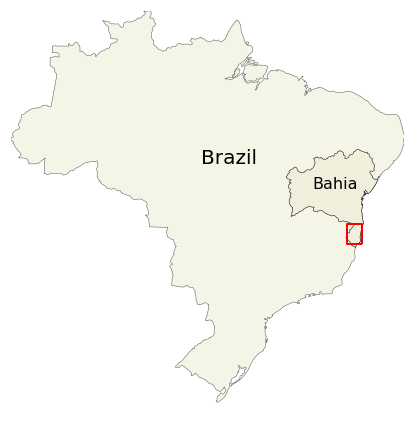

In [3]:
# Southern Bahia.
land = [0.9375, 0.9375, 0.859375]
extent = [-40.5, -39, -18, -16]
projection = ccrs.PlateCarree()

fig, ax = make_map(projection=projection)

for record, country in zip(countries.records(), countries.geometries()):
    name = record.attributes['name']
    if name == 'Brazil':
        ax.add_geometries([country], ccrs.PlateCarree(), linewidth=0.5,
                          facecolor=land, edgecolor='black', alpha=0.65)

for record, state in zip(states.records(), states.geometries()):
    name = record.attributes['name']
    if name == 'Bahia':
        ax.add_geometries([state], ccrs.PlateCarree(), linewidth=0.5,
                          facecolor=land, edgecolor='black')

ax.background_patch.set_visible(False)
ax.outline_patch.set_visible(False)
ax.set_extent(
    extents=[-73.9844, -34.792, -33.7525, 5.25139],
    crs=ccrs.Geodetic()
)

extent_box = sgeom.box(extent[0], extent[2], extent[1], extent[3])
feat = ax.add_geometries(
    geoms=[extent_box],
    crs=projection,
    color='none',
    edgecolor='red',
    linewidth=2,
)

ax.text(-55, -10, 'Brazil', fontsize=20)
ax.text(-44, -12.5, 'Bahia', fontsize=16)

for fmt in fmts:
    fig.savefig('00-brazil-bahia-sul.{}'.format(fmt), format=fmt, **figkw)

### Load and split position data

`Sampling_Data_Alcobaca.xlsx`

In [4]:
import pandas as pd


dfa = pd.read_excel('Sampling_Data_Alcobaca.xlsx')

# Remove tomatoes
dfa = dfa.loc[~dfa['Sample'].str.lower().str.contains('tomates')]

# split water
water = dfa.loc[dfa['Sample'].str.lower().str.contains('water')]
water['labels'] = ['A1', 'A2', 'A3', 'A6', 'A4', 'A5']
water = water.reset_index().set_index('labels').sort_index()

# split soil
soil = dfa.loc[dfa['Sample'].str.lower().str.contains('soil')]
soil = soil.drop('ALC022')  # Error in the analisys
soil = soil.drop('ALC011')  # Duplication of ALC010
soil['labels'] = ['AL01', 'AL02', 'AL03', 'AL04', 'AL05', 'AL06', 'AL07', 'AL08', 'AL08',
                  'AL09', 'AL10', 'AL11', 'AL12', 'AL13', 'AL14', 'AL15', 'AL16', 'AL17']
soil = soil.reset_index().set_index('labels').sort_index()

/home/filipe/miniconda3/envs/IOOS/lib/python3.6/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [5]:
import pandas as pd


def fix_position(pos):
    pos = pos.strip()
    pos = pos.replace("'", "")
    pos = pos.replace(",", ".")
    pos = pos.replace("°", "")
    pos = list(map(float, pos.split()))
    pos = pos[0] + pos[1] / 60.0 + pos[2] / 60.0 /60.0
    return -pos


dfc = pd.read_excel('Sampling_Data_Caravelas.xlsx', )
dfc.rename(inplace=True,
    columns={
        'Amostras': 'samples',
        'Profundidade (m)': 'depth (m)',
        'hora': 'time',
        'Temperatura (°C)': 'temperature',
        'Salinidade': 'salinity',
    }
)

dfc['Latitude'] = dfc['Latitude'].apply(fix_position)
dfc['Longitude'] = dfc['Longitude'].apply(fix_position)

dfc.index +=1
dfc.index = 'S' + dfc.index.astype(str)

dfc

,samples,Latitude,Longitude,depth (m),time,temperature,pH,Eh,OD (mg L),OD (%),salinity
S1,1,-17.942528,-39.217389,6.3,10:30:00,26.41,7.82,248,12.40,187.7,31.3
S2,2,-17.919444,-39.211944,9.0,10:59:00,26.54,7.86,249,8.35,128.8,31.4
S3,3,-17.894361,-39.208972,9.3,11:30:00,26.49,7.85,251,7.62,115.5,31.3
S4,5,-17.847306,-39.195556,7.2,12:25:00,26.65,7.83,249,12.86,195.0,31.0
S5,6,-17.821222,-39.187361,6.0,12:55:00,26.86,7.85,249,12.73,193.4,30.7
S6,7,-17.754722,-39.202639,7.2,13:25:00,27.79,7.77,256,9.33,143.8,30.8
S7,8,-17.749417,-39.232861,2.1,13:55:00,27.33,7.73,258,7.16,109.6,30.7
S8,9,-17.739750,-39.270361,2.3,13:55:00,27.12,7.53,266,4.78,115.3,30.7
S9,10,-17.726833,-39.268694,3.2,14:58:00,26.97,7.48,268,4.78,72.7,30.6
S10,11,-17.726083,-39.266944,2.5,15:19:00,26.63,7.48,264,7.92,119.5,30.2


### Load high resolution coastline and river data

In [6]:
import os
import geopandas


path = os.path.join(os.path.pardir, 'BTS_SHP')
bts = geopandas.read_file(path)
bts = bts['geometry'].values.tolist()[0]

path = os.path.join(os.path.pardir, 'HIDROG1')
rivers = geopandas.read_file(path)

In [7]:
from shapely import geometry, ops


rivers = rivers.loc[
    (rivers['TIPO'] == 'Rio de Margem Dupla Permanente') &
    rivers['ENTITY'].isin(['Line String', 'Complex Chain'])   
]['geometry']

rivers = ops.cascaded_union(rivers)
rivers = rivers.intersection(geometry.box(*extent))

In [8]:
import pandas as pd


itanhentinga = pd.read_csv('ItanhentingaRiver.csv')

### Map with all the points

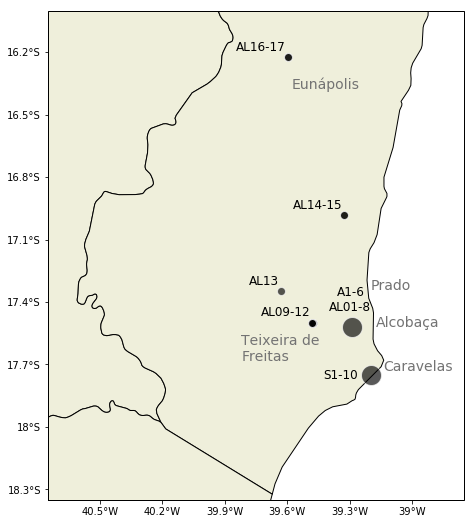

In [9]:
import numpy as np
from cartopy.feature import NaturalEarthFeature

fig, ax = make_map(projection=projection, figsize=(9, 9))

extent = [-40.75, -38.75, -18.35, -16]
ax.set_extent(extent)

ax.set_xticks(np.arange(-40.5, -38.7, 0.3), crs=projection)
ax.set_yticks(np.arange(-18.3, -16.2, 0.3), crs=projection)
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

ax.coastlines(resolution='10m', linewidth=0)
ax.add_feature(states_high, facecolor=land, edgecolor='black')

cities = {
    'Alcobaça': (-39.195833+0.02, -17.518889),
    'Caravelas': (-39.265833+0.125, -17.731944),
    'Eunápolis': (-39.58, -16.377778),
    'Prado': (-39.220833+0.02, -17.340833),
    'Teixeira de\nFreitas': (-39.741944-0.08, -17.535-0.15),
}

for city, (lon, lat) in cities.items():
    ax.text(lon, lat, city, fontsize=14, color='0.45')


markersize = 20

# Alcobaça.
ax.plot(-39.29, -17.52,
        marker='o',
        color='black',
        alpha=0.65,
        linestyle='none',
        markeredgecolor='white',
        markersize=markersize,)
ax.annotate('AL01-8', xy=(-39.29, -17.52), xycoords='data',
            xytext=(-1.5, 20), textcoords='offset pixels',
            arrowprops=None, fontsize=12, horizontalalignment='center', verticalalignment='center')
ax.annotate('A1-6', xy=(-39.29, -17.52), xycoords='data',
            xytext=(-1.5, +35), textcoords='offset pixels',
            arrowprops=None, fontsize=12, horizontalalignment='center', verticalalignment='center')

# Caravelas
ax.plot(-39.2, -17.75,
        marker='o',
        color='black',
        alpha=0.65,
        linestyle='none',
        markeredgecolor='white',
        markersize=markersize,)
ax.annotate('S1-10', xy=(-39.2, -17.75), xycoords='data',
            xytext=(-30, 0), textcoords='offset pixels',
            arrowprops=None, fontsize=12, horizontalalignment='center', verticalalignment='center')

ax.plot(
    soil['AL09':]['Longitude'], soil['AL09':]['Latitude'],
    marker='o',
    color='black',
    alpha=0.65,
    linestyle='none',
    markeredgecolor='white',
    markersize=8,
)

for idx, row in soil.iterrows():
    if idx in ['AL09', 'AL13', 'AL14', 'AL16']:
        if idx == 'AL16':
            idx = 'AL16-17'
        if idx == 'AL14':
            idx = 'AL14-15'
        if idx == 'AL09':
            idx = 'AL09-12'
        ax.annotate(idx, xy=(row['Longitude'], row['Latitude']), xycoords='data',
                    xytext=(-2, 10), textcoords='offset pixels',
                    arrowprops=None, fontsize=12, horizontalalignment='right', verticalalignment='center')

for fmt in fmts:
    fig.savefig('01-bahia-sul-all_points.{}'.format(fmt), format=fmt, **figkw)

### Caravelas

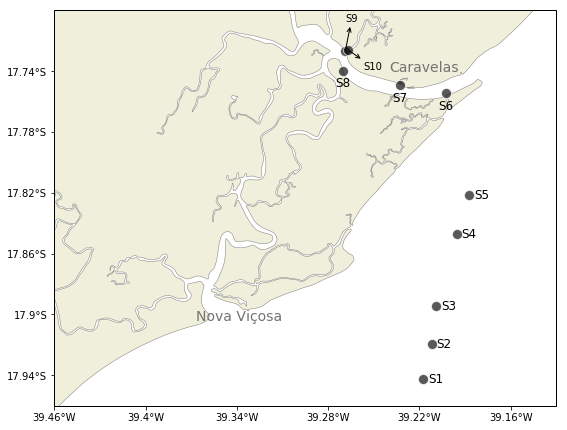

In [10]:
fig, ax = make_map(projection=projection, figsize=(9, 9))

kwpt = dict(
    color='black',
    alpha=0.65,
    linestyle='none',
    markeredgecolor='white',
    markersize=10,
)

ax.plot(dfc['Longitude'], dfc['Latitude'], marker='o', **kwpt)

extent = [-39.46, -39.13, -17.96, -17.70]
ax.set_extent(extent)

ax.set_xticks(np.arange(-39.46, -39.16, 0.06), crs=projection)
ax.set_yticks(np.arange(-17.94, -17.73, 0.04), crs=projection)
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

kw = dict(facecolor=land, edgecolor='gray', linewidth=0.5)
ax.add_geometries(bts, projection, **kw)

ax.text(-39.255+0.015, -17.74, 'Caravelas', fontsize=14, color='0.45')
ax.text(-39.367, -17.904, 'Nova Viçosa', fontsize=14, color='0.45')

dx = dy = 0.008
kw = dict(
    fontsize=12,
    horizontalalignment='center',
    verticalalignment='center'
)

for idx, row in dfc.iterrows():
    if idx not in ['S10', 'S9', 'S8', 'S7', 'S6']:
        ax.text(row['Longitude']+dx, row['Latitude'], idx, **kw)
    if idx in ['S8', 'S7', 'S6']:
        ax.text(row['Longitude'], row['Latitude']-dy, idx, **kw)

row = dfc.loc['S9']
ax.annotate(
    row.name,
    xy=(row['Longitude'], row['Latitude']), xycoords='data',
    xytext=(0.2, 30), textcoords='offset pixels',
    arrowprops=dict(arrowstyle='<-'),
)

row = dfc.loc['S10']
ax.annotate(
    row.name,
    xy=(row['Longitude'], row['Latitude']), xycoords='data',
    xytext=(15, -20), textcoords='offset pixels',
    arrowprops=dict(arrowstyle='<-'),
)

for fmt in fmts:
    fig.savefig('02-caravelas.{}'.format(fmt), format=fmt, **figkw)

### Alcobaça

### Water

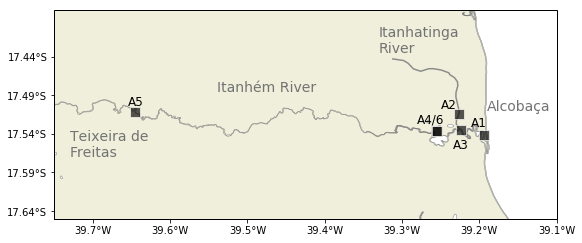

In [11]:
fig, ax = make_map(projection=projection, figsize=(9, 9))

extent = [-39.75, -39.10, -17.65, -17.38]
ax.set_extent(extent)

ax.set_xticks(np.arange(-39.7, -39.1, 0.1), crs=projection)
ax.set_yticks(np.arange(-17.64, -17.43, 0.05), crs=projection)
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

ax.add_geometries(bts, projection, facecolor=land, edgecolor='gray', linewidth=0.5)
ax.add_geometries(rivers, projection, facecolor='none', edgecolor='gray', linewidth=0.5)
ax.plot(itanhentinga['Lon'], itanhentinga['Lat'], '0.55')

ax.text(-39.21+0.02, -17.52+0.01, 'Alcobaça', fontsize=14, color='0.45')
ax.text(-39.73, -17.55-0.02, 'Teixeira de\nFreitas', fontsize=14, color='0.45')
ax.text(-39.6+0.06, -17.5+0.015, 'Itanhém River', fontsize=14, color='0.45')
ax.text(-39.35+0.02, -17.465+0.03, 'Itanhatinga\nRiver', fontsize=14, color='0.45')

ax.plot(water['Longitude'], water['Latitude'], marker='s', **kwpt)

kw = dict(
    textcoords='offset pixels',
    arrowprops=None,
    fontsize=12,
    horizontalalignment='center',
    verticalalignment='center'
)

row = water.loc['A1']
ax.annotate(row.name, xy=(row['Longitude'], row['Latitude']), xycoords='data', xytext=(-5, 12), **kw)

row = water.loc['A2']
ax.annotate(row.name, xy=(row['Longitude'], row['Latitude']), xycoords='data', xytext=(-10, 10), **kw)

row = water.loc['A3']
ax.annotate(row.name, xy=(row['Longitude'], row['Latitude']), xycoords='data', xytext=(0, -15), **kw)

row = water.loc['A4']
ax.annotate('A4/6', xy=(row['Longitude'], row['Latitude']), xycoords='data', xytext=(-5, 12), **kw)

row = water.loc['A5']
ax.annotate(row.name, xy=(row['Longitude'], row['Latitude']), xycoords='data', xytext=(0, 10), **kw)

# A6
# row = water.iloc[5]
# ax.annotate(row.name, xy=(row['Longitude'], row['Latitude']), xycoords='data',
#             xytext=(-5, -15), textcoords='offset pixels',
#             arrowprops=None, fontsize=12,
#             horizontalalignment='center', verticalalignment='center')

for fmt in fmts:
    fig.savefig('03-alcobaca.{}'.format(fmt), format=fmt, **figkw)

### Soil

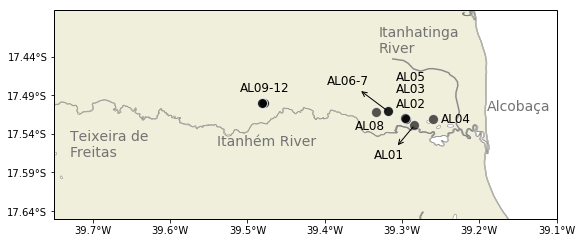

In [12]:
fig, ax = make_map(projection=projection, figsize=(9, 9))

extent = [-39.75, -39.10, -17.65, -17.38]
ax.set_extent(extent)

ax.set_xticks(np.arange(-39.7, -39.1, 0.1), crs=projection)
ax.set_yticks(np.arange(-17.64, -17.43, 0.05), crs=projection)
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

ax.add_geometries(bts, projection, facecolor=land, edgecolor='gray', linewidth=0.5)
ax.add_geometries(rivers, projection, facecolor='none', edgecolor='gray', linewidth=0.5)
ax.plot(itanhentinga['Lon'], itanhentinga['Lat'], '0.55')

ax.text(-39.21+0.02, -17.52+0.01, 'Alcobaça', fontsize=14, color='0.45')
ax.text(-39.73, -17.55-0.02, 'Teixeira de\nFreitas', fontsize=14, color='0.45')
ax.text(-39.6+0.06, -17.5-0.055, 'Itanhém River', fontsize=14, color='0.45')
ax.text(-39.35+0.02, -17.465+0.03, 'Itanhatinga\nRiver', fontsize=14, color='0.45')

tdf = soil[soil['index'] != 'ALC015']
ax.plot(tdf['Longitude'], tdf['Latitude'], marker='o', **kwpt)

kw = dict(
    textcoords='offset pixels',
    fontsize=12,
    horizontalalignment='center',
    verticalalignment='center'
)


row = soil.loc['AL01']
ax.annotate(row.name, xy=(row['Longitude'], row['Latitude']), xycoords='data', xytext=(-25, -30),
            arrowprops=dict(arrowstyle='<-'), **kw)

row = soil.loc['AL02']
ax.annotate(row.name, xy=(row['Longitude'], row['Latitude']), xycoords='data', xytext=(+5, +15), **kw)

row = soil.loc['AL03']
ax.annotate(row.name, xy=(row['Longitude'], row['Latitude']), xycoords='data', xytext=(+5, +30), **kw)

row = soil.loc['AL04']
ax.annotate(row.name, xy=(row['Longitude'], row['Latitude']), xycoords='data', xytext=(+22, 0), **kw)

row = soil.loc['AL05']
ax.annotate(row.name, xy=(row['Longitude'], row['Latitude']), xycoords='data', xytext=(+6, +41), **kw)

row = soil.loc['AL06']
ax.annotate('AL06-7', xy=(row['Longitude'], row['Latitude']), xycoords='data', xytext=(-40, +30),
            arrowprops=dict(arrowstyle='<-'), **kw)

# row = soil.loc['AL07']
# ax.annotate(row.name, xy=(row['Longitude'], row['Latitude']), xycoords='data', xytext=(0, +30), **kw)

row = soil.loc['AL08'].iloc[0]
ax.annotate(row.name, xy=(row['Longitude'], row['Latitude']), xycoords='data', xytext=(-5, -15), **kw)

row = soil.loc['AL09']
ax.annotate('AL09-12', xy=(row['Longitude'], row['Latitude']), xycoords='data', xytext=(+1, 15), **kw)

# row = soil.loc['AL10']
# ax.annotate(row.name, xy=(row['Longitude'], row['Latitude']), xycoords='data', xytext=(0, +30), **kw)

# row = soil.loc['AL11']
# ax.annotate(row.name, xy=(row['Longitude'], row['Latitude']), xycoords='data', xytext=(2, +45), **kw)

# row = soil.loc['AL12']
# ax.annotate(row.name, xy=(row['Longitude'], row['Latitude']), xycoords='data', xytext=(2, +60), **kw)

for fmt in fmts:
    fig.savefig('04-alcobaca.{}'.format(fmt), format=fmt, **figkw)